In [49]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from tabulate import tabulate

In [9]:
df = pd.read_csv("Datasets/babyboom.csv")
df.columns = ["TimeOfBirth", "Sex", "WeightInGrams", "MinutesAfterMidnight"]

╒════════════╤════════════╕
│   Skewness │   Kurtosis │
╞════════════╪════════════╡
│  -1.14394  │   1.04249  │
├────────────┼────────────┤
│  -0.932616 │  -0.325905 │
├────────────┼────────────┤
│  -0.970952 │   1.91234  │
╘════════════╧════════════╛


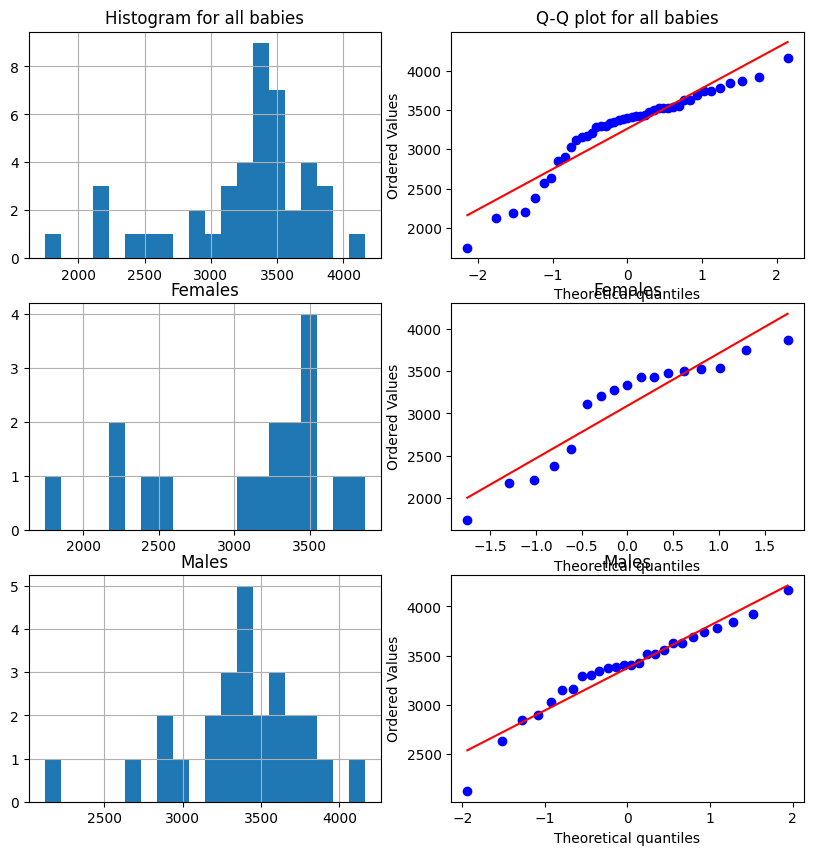

In [55]:
# Build histograms and qq-plots for WeightInGrams
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
table_data = []

df["WeightInGrams"].hist(bins=20, ax=axes[0, 0])
axes[0, 0].set_title("Histogram for all babies")
stats.probplot(df["WeightInGrams"], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Q-Q plot for all babies")
table_data.append([df["WeightInGrams"].skew(), df["WeightInGrams"].kurt()])

for i, title in enumerate(["Females", "Males"]):
    data = df[df["Sex"] == i+1]
    data["WeightInGrams"].hist(bins=20, ax=axes[i+1, 0])
    axes[i+1, 0].set_title(title)
    stats.probplot(data["WeightInGrams"], dist="norm", plot=axes[i+1, 1])
    axes[i+1, 1].set_title(title)
    table_data.append([data["WeightInGrams"].skew(), data["WeightInGrams"].kurt()])

table = tabulate(
    table_data,
    headers=["Skewness", "Kurtosis"],
    tablefmt="fancy_grid"
)

print(table)


<Axes: >

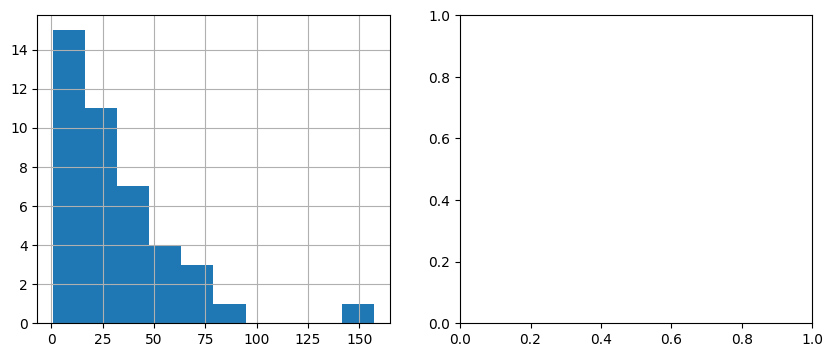

In [66]:
data = df["MinutesAfterMidnight"].diff()[1:]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
data.hist(bins=10, ax=axes[0])
